In [127]:
#use pip install instead of conda install.
!pip install geopandas

In [128]:
#looking at data for NYC in and out
#data for Florida in and out
#compare results
import pandas as pd
import matplotlib.pyplot as plt 
import geopandas

In [129]:
mig= pd.read_csv("U:\CUNY Course\Migration_Flows_from_2010_to_2019.csv")

In [130]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
mig.head(200)

current_state  year  population  same_house  same_state  \
0                  Alabama  2010     4729509     3987155      620465   
1                   Alaska  2010      702974      565031       95878   
2                  Arizona  2010     6332786     5069002     1001991   
3                 Arkansas  2010     2888304     2387806      412997   
4               California  2010    36907897    30790221     5413287   
5                 Colorado  2010     4988190     4042039      725413   
6              Connecticut  2010     3541146     3100742      342904   
7                 Delaware  2010      889812      764640       90001   
8    District of Columbia   2010      596747      474676       63766   
9                  Florida  2010    18647600    15554008     2459530   
10                 Georgia  2010     9587237     8015409     1278548   
11                  Hawaii  2010     1346274     1140572      134315   
12                   Idaho  2010     1550967     1279856      209272   
13                Illinois  2010    12680126    11009852     1404525   
14                 Indiana  2010     6414862     5431015      833086   
15                    Iowa  2010     3013053     2553210      375650   
16                  Kansas  2010     2820894     2341401      372161   
17                Kentucky  2010     4296639     3638259      519887   
18               Louisiana  2010     4483529     3826390      547291   
19                   Maine  2010     1313902     1136780      146735   
20                Maryland  2010     5716785     4917637      588879   
21           Massachusetts  2010     6489250     5583650      706624   
22                Michigan  2010     9762127     8310098     1291901   
23               Minnesota  2010     5244256     4480630      647946   
24             Mississippi  2010     2931228     2510729      340266   
25                Missouri  2010     5920858     4968921      786726   
26                 Montana  2010      978507      821709      117752   
27                Nebraska  2010     1802697     1497138      247005   
28                  Nevada  2010     2667364     2030410      517261   
29           New Hampshire  2010     1303865     1118359      141213   
30              New Jersey  2010     8709933     7841470      684482   
31              New Mexico  2010     2039549     1735950      220663   
32                New York  2010    19171916    16976205     1779540   
33          North Carolina  2010     9443000     7982017     1141001   
34            North Dakota  2010      665654      556222       75720   
35                    Ohio  2010    11405101     9745227     1453401   
36                Oklahoma  2010     3716264     3065497      528824   
37                  Oregon  2010     3794008     3110896      545841   
38            Pennsylvania  2010    12577555    11053022     1239199   
39            Rhode Island  2010     1042240      900283       99603   
40          South Carolina  2010     4577399     3870879      537961   
41            South Dakota  2010      805616      680993       96805   
42               Tennessee  2010     6282706     5299496      801355   
43                   Texas  2010    24899075    20500156     3740344   
44                    Utah  2010     2724064     2240636      388410   
45                 Vermont  2010      619363      534975       59032   
46                Virginia  2010     7930773     6752310      870491   
47              Washington  2010     6661321     5464985      946923   
48           West Virginia  2010     1833535     1625125      166168   
49               Wisconsin  2010     5623196     4824045      691592   
50                 Wyoming  2010      556954      444614       82255   
51             Puerto Rico  2010     3676493     3392179      247593   
52                 Alabama  2011     4745278     4024442      588293   
53                  Alaska  2011      711962      571857      100280   
54                 Arizona  2011     6402301     5107

In [131]:
mig.shape

(28080, 9)

In [132]:
mig.isnull().sum()

current_state                 0
year                          0
population                    0
same_house                    0
same_state                    0
from_different_state_Total    0
abroad_Total                  0
from                          0
number_of_people              0
dtype: int64

In [133]:
mig.dtypes

current_state                 object
year                           int64
population                     int64
same_house                     int64
same_state                     int64
from_different_state_Total     int64
abroad_Total                   int64
from                          object
number_of_people               int64
dtype: object

In [134]:
#avg year for migration was 2014
mig.describe()

year    population    same_house    same_state  \
count  28080.000000  2.808000e+04  2.808000e+04  2.808000e+04   
mean    2014.500000  6.140414e+06  5.243854e+06  7.181260e+05   
std        2.872332  6.927290e+06  5.938902e+06  8.440772e+05   
min     2010.000000  5.569540e+05  4.446140e+05  5.081800e+04   
25%     2012.000000  1.771042e+06  1.492538e+06  1.762428e+05   
50%     2014.500000  4.237608e+06  3.582718e+06  5.303820e+05   
75%     2017.000000  6.861015e+06  5.871437e+06  8.478912e+05   
max     2019.000000  3.911489e+07  3.439422e+07  5.413287e+06   

       from_different_state_Total   abroad_Total  number_of_people  
count                28080.000000   28080.000000      28080.000000  
mean                140583.242308   37850.828846       3304.334651  
std                 122343.442677   56136.202443      10126.482639  
min                  18511.000000    1282.000000          0.000000  
25%                  52392.750000    7511.000000        198.750000  
50%                 106647.000000   17804.500000        829.000000  
75%                 190914.750000   46444.000000       2746.000000  
max                 605018.000000  336667.000000     334039.000000

In [135]:
mig.rename(columns={'from':'State_Migrated_from'}, inplace=True)

In [136]:
mig2 = mig[(mig['current_state'].isin (['New York', 'Florida']))]
mig2

current_state  year  population  same_house  same_state  \
9           Florida  2010    18647600    15554008     2459530   
32         New York  2010    19171916    16976205     1779540   
61          Florida  2011    18863948    15742168     2454255   
84         New York  2011    19248685    17055260     1756105   
113         Florida  2012    19114620    16032617     2380288   
136        New York  2012    19352153    17202134     1723117   
165         Florida  2013    19345059    16199361     2442119   
188        New York  2013    19431954    17297785     1715158   
217         Florida  2014    19683763    16504838     2436619   
240        New York  2014    19528220    17418181     1693064   
269         Florida  2015    20068392    16832374     2438828   
292        New York  2015    19570171    17506652     1653268   
321         Florida  2016    20401575    17176492     2387227   
344        New York  2016    19526443    17465164     1634487   
373         Florida  2017    20772371    17554348     2402381   
396        New York  2017    19638923    17553033     1655152   
425         Florida  2018    21092877    17863603     2420485   
448        New York  2018    19329704    17327068     1614505   
477         Florida  2019    21269409    18083185     2381208   
500        New York  2019    19240920    17213380     1638372   
529         Florida  2010    18647600    15554008     2459530   
552        New York  2010    19171916    16976205     1779540   
581         Florida  2011    18863948    15742168     2454255   
604        New York  2011    19248685    17055260     1756105   
633         Florida  2012    19114620    16032617     2380288   
656        New York  2012    19352153    17202134     1723117   
685         Florida  2013    19345059    16199361     2442119   
708        New York  2013    19431954    17297785     1715158   
737         Florida  2014    19683763    16504838     2436619   
760        New York  2014    19528220    17418181     1693064   
789         Florida  2015    20068392    16832374     2438828   
812        New York  2015    19570171    17506652     1653268   
841         Florida  2016    20401575    17176492     2387227   
864        New York  2016    19526443    17465164     1634487   
893         Florida  2017    20772371    17554348     2402381   
916        New York  2017    19638923    17553033     1655152   
945         Florida  2018    21092877    17863603     2420485   
968        New York  2018    19329704    17327068     1614505   
997         Florida  2019    21269409    18083185     2381208   
1020       New York  2019    19240920    17213380     1638372   
1049        Florida  2010    18647600    15554008     2459530   
1072       New York  2010    19171916    16976205     1779540   
1101        Florida  2011    18863948    15742168     2454255   
1124       New York  2011    19248685    17055260     1756105   
1153        Florida  2012    19114620    16032617     2380288   
1176       New York  2012    19352153    17202134     1723117   
1205        Florida  2013    19345059    16199361     2442119   
1228       New York  2013    19431954    17297785     1715158   
1257        Florida  2014    19683763    16504838     2436619   
1280       New York  2014    19528220    17418181     1693064   
1309        Florida  2015    20068392    16832374     2438828   
1332       New York  2015    19570171    17506652     1653268   
1361        Florida  2016    20401575    17176492     2387227   
1384       New York  2016    19526443    17465164     1634487   
1413        Florida  2017    20772371    17554348     2402381   
1436       New York  2017    19638923    17553033     1655152   
1465        Florida  2018    21092877    17863603     2420485   
1488       New York  2018    19329704    17327068     1614505   
1517        Florida  2019    21269409    18083185     2381208   
1540       New York  2019    19240920    17213380     1638372   
1569        Florida  2010    18647600    

Trying to understand is this data correct or not. According to the 2010 Census, NYS population was 19,387,102 and Florida was 18,801,310. Not far off from the numbers we have below in this data set which are NYS 19,171,916 and Florida 18,647,600. We can find the percentage from of people who moved to New York or Florida from a different state vs. the actual number of people from specific states. 
https://www.census.gov/quickfacts/fact/table/FL/PST045222 https://www.census.gov/quickfacts/fact/table/NY/PST045223

# Population figures

In [137]:
#need to create another column
population_group=mig2[['current_state','year','population','from_different_state_Total','number_of_people','State_Migrated_from']].reset_index(drop='True')
population_group
population_group['Total_Migration']= population_group['from_different_state_Total']+population_group['number_of_people']
population_group


current_state  year  population  from_different_state_Total  \
0          Florida  2010    18647600                      482889   
1         New York  2010    19171916                      269427   
2          Florida  2011    18863948                      498597   
3         New York  2011    19248685                      282209   
4          Florida  2012    19114620                      537148   
5         New York  2012    19352153                      270053   
6          Florida  2013    19345059                      529406   
7         New York  2013    19431954                      272066   
8          Florida  2014    19683763                      546501   
9         New York  2014    19528220                      258571   
10         Florida  2015    20068392                      584938   
11        New York  2015    19570171                      257611   
12         Florida  2016    20401575                      605018   
13        New York  2016    19526443                      260723   
14         Florida  2017    20772371                      566476   
15        New York  2017    19638923                      285252   
16         Florida  2018    21092877                      587261   
17        New York  2018    19329704                      254447   
18         Florida  2019    21269409                      601611   
19        New York  2019    19240920                      254806   
20         Florida  2010    18647600                      482889   
21        New York  2010    19171916                      269427   
22         Florida  2011    18863948                      498597   
23        New York  2011    19248685                      282209   
24         Florida  2012    19114620                      537148   
25        New York  2012    19352153                      270053   
26         Florida  2013    19345059                      529406   
27        New York  2013    19431954                      272066   
28         Florida  2014    19683763                      546501   
29        New York  2014    19528220                      258571   
30         Florida  2015    20068392                      584938   
31        New York  2015    19570171                      257611   
32         Florida  2016    20401575                      605018   
33        New York  2016    19526443                      260723   
34         Florida  2017    20772371                      566476   
35        New York  2017    19638923                      285252   
36         Florida  2018    21092877                      587261   
37        New York  2018    19329704                      254447   
38         Florida  2019    21269409                      601611   
39        New York  2019    19240920                      254806   
40         Florida  2010    18647600                      482889   
41        New York  2010    19171916                      269427   
42         Florida  2011    18863948                      498597   
43        New York  2011    19248685                      282209   
44         Florida  2012    19114620                      537148   
45        New York  2012    19352153                      270053   
46         Florida  2013    19345059                      529406   
47        New York  2013    19431954                      272066   
48         Florida  2014    19683763                      546501   
49        New York  2014    19528220                      258571   
50         Florida  2015    20068392                      584938   
51        New York  2015    19570171                      257611   
52         Florida  2016    20401575                      605018   
53        New York  2016    19526443                      260723   
54         Florida  2017    20772371                      566476   
55        New York  2017    19638923                      285252   
56         Florida  2018    21092877                      587261   
57        New York  2018    19329704                      254

In [138]:
population_group[(population_group['current_state'] == 'New York')& ((population_group['year'] == 2010)|(population_group['year']== 2019))].groupby(['State_Migrated_from','year','from_different_state_Total','Total_Migration'])['number_of_people'].sum().reset_index()

State_Migrated_from  year  from_different_state_Total  Total_Migration  \
0                  Alabama  2010                      269427           270737   
1                  Alabama  2019                      254806           255657   
2                   Alaska  2010                      269427           274497   
3                   Alaska  2019                      254806           255402   
4                  Arizona  2010                      269427           272076   
5                  Arizona  2019                      254806           256991   
6                 Arkansas  2010                      269427           269789   
7                 Arkansas  2019                      254806           255936   
8               California  2010                      269427           294604   
9               California  2019                      254806           279138   
10                Colorado  2010                      269427           272562   
11                Colorado  2019                      254806           260560   
12             Connecticut  2010                      269427           284765   
13             Connecticut  2019                      254806           269846   
14                Delaware  2010                      269427           272030   
15                Delaware  2019                      254806           256461   
16   District of Columbia   2010                      269427           271410   
17   District of Columbia   2019                      254806           258131   
18                 Florida  2010                      269427           299980   
19                 Florida  2019                      254806           273782   
20                 Georgia  2010                      269427           277103   
21                 Georgia  2019                      254806           260744   
22                  Hawaii  2010                      269427           269686   
23                  Hawaii  2019                      254806           256107   
24                   Idaho  2010                      269427           269625   
25                   Idaho  2019                      254806           254944   
26                Illinois  2010                      269427           275960   
27                Illinois  2019                      254806           261253   
28                 Indiana  2010                      269427           271924   
29                 Indiana  2019                      254806           256276   
30                    Iowa  2010                      269427           269904   
31                    Iowa  2019                      254806           256360   
32                  Kansas  2010                      269427           270616   
33                  Kansas  2019                      254806           256135   
34                Kentucky  2010                      269427           270231   
35                Kentucky  2019                      254806           256359   
36               Louisiana  2010                      269427           270748   
37               Louisiana  2019                      254806           256563   
38                   Maine  2010                      269427           271697   
39                   Maine  2019                      254806           256724   
40                Maryland  2010                      269427           275339   
41                Maryland  2019                      254806           260821   
42           Massachusetts  2010                      269427           286282   
43           Massachusetts  2019                      254806           272716   
44                Michigan  2010                      269427           274206   
45                Michigan  2019                      254806           260310   
46               Minnesota  2010                      269427           271076   
47               Minnesota  2019                      254806           257043   
48             Mississippi  2010      

In [139]:
population_group

current_state  year  population  from_different_state_Total  \
0          Florida  2010    18647600                      482889   
1         New York  2010    19171916                      269427   
2          Florida  2011    18863948                      498597   
3         New York  2011    19248685                      282209   
4          Florida  2012    19114620                      537148   
5         New York  2012    19352153                      270053   
6          Florida  2013    19345059                      529406   
7         New York  2013    19431954                      272066   
8          Florida  2014    19683763                      546501   
9         New York  2014    19528220                      258571   
10         Florida  2015    20068392                      584938   
11        New York  2015    19570171                      257611   
12         Florida  2016    20401575                      605018   
13        New York  2016    19526443                      260723   
14         Florida  2017    20772371                      566476   
15        New York  2017    19638923                      285252   
16         Florida  2018    21092877                      587261   
17        New York  2018    19329704                      254447   
18         Florida  2019    21269409                      601611   
19        New York  2019    19240920                      254806   
20         Florida  2010    18647600                      482889   
21        New York  2010    19171916                      269427   
22         Florida  2011    18863948                      498597   
23        New York  2011    19248685                      282209   
24         Florida  2012    19114620                      537148   
25        New York  2012    19352153                      270053   
26         Florida  2013    19345059                      529406   
27        New York  2013    19431954                      272066   
28         Florida  2014    19683763                      546501   
29        New York  2014    19528220                      258571   
30         Florida  2015    20068392                      584938   
31        New York  2015    19570171                      257611   
32         Florida  2016    20401575                      605018   
33        New York  2016    19526443                      260723   
34         Florida  2017    20772371                      566476   
35        New York  2017    19638923                      285252   
36         Florida  2018    21092877                      587261   
37        New York  2018    19329704                      254447   
38         Florida  2019    21269409                      601611   
39        New York  2019    19240920                      254806   
40         Florida  2010    18647600                      482889   
41        New York  2010    19171916                      269427   
42         Florida  2011    18863948                      498597   
43        New York  2011    19248685                      282209   
44         Florida  2012    19114620                      537148   
45        New York  2012    19352153                      270053   
46         Florida  2013    19345059                      529406   
47        New York  2013    19431954                      272066   
48         Florida  2014    19683763                      546501   
49        New York  2014    19528220                      258571   
50         Florida  2015    20068392                      584938   
51        New York  2015    19570171                      257611   
52         Florida  2016    20401575                      605018   
53        New York  2016    19526443                      260723   
54         Florida  2017    20772371                      566476   
55        New York  2017    19638923                      285252   
56         Florida  2018    21092877                      587261   
57        New York  2018    19329704                      254

In [140]:
#creating new column before percnt and multiply by 100 or 10,000 depending on the decimal placement you would like.
#change dtype as float and rounding to two decimal places for presentation of dtype in new column.
#check that the data makes sense by doing the math sep
population_group['Percentage_from_diff_state'] = (population_group['number_of_people']/population_group['Total_Migration'])*100
population_group['Percentage_from_diff_state'] = population_group['Percentage_from_diff_state'].astype(float).round(2)
population_group


current_state  year  population  from_different_state_Total  \
0          Florida  2010    18647600                      482889   
1         New York  2010    19171916                      269427   
2          Florida  2011    18863948                      498597   
3         New York  2011    19248685                      282209   
4          Florida  2012    19114620                      537148   
5         New York  2012    19352153                      270053   
6          Florida  2013    19345059                      529406   
7         New York  2013    19431954                      272066   
8          Florida  2014    19683763                      546501   
9         New York  2014    19528220                      258571   
10         Florida  2015    20068392                      584938   
11        New York  2015    19570171                      257611   
12         Florida  2016    20401575                      605018   
13        New York  2016    19526443                      260723   
14         Florida  2017    20772371                      566476   
15        New York  2017    19638923                      285252   
16         Florida  2018    21092877                      587261   
17        New York  2018    19329704                      254447   
18         Florida  2019    21269409                      601611   
19        New York  2019    19240920                      254806   
20         Florida  2010    18647600                      482889   
21        New York  2010    19171916                      269427   
22         Florida  2011    18863948                      498597   
23        New York  2011    19248685                      282209   
24         Florida  2012    19114620                      537148   
25        New York  2012    19352153                      270053   
26         Florida  2013    19345059                      529406   
27        New York  2013    19431954                      272066   
28         Florida  2014    19683763                      546501   
29        New York  2014    19528220                      258571   
30         Florida  2015    20068392                      584938   
31        New York  2015    19570171                      257611   
32         Florida  2016    20401575                      605018   
33        New York  2016    19526443                      260723   
34         Florida  2017    20772371                      566476   
35        New York  2017    19638923                      285252   
36         Florida  2018    21092877                      587261   
37        New York  2018    19329704                      254447   
38         Florida  2019    21269409                      601611   
39        New York  2019    19240920                      254806   
40         Florida  2010    18647600                      482889   
41        New York  2010    19171916                      269427   
42         Florida  2011    18863948                      498597   
43        New York  2011    19248685                      282209   
44         Florida  2012    19114620                      537148   
45        New York  2012    19352153                      270053   
46         Florida  2013    19345059                      529406   
47        New York  2013    19431954                      272066   
48         Florida  2014    19683763                      546501   
49        New York  2014    19528220                      258571   
50         Florida  2015    20068392                      584938   
51        New York  2015    19570171                      257611   
52         Florida  2016    20401575                      605018   
53        New York  2016    19526443                      260723   
54         Florida  2017    20772371                      566476   
55        New York  2017    19638923                      285252   
56         Florida  2018    21092877                      587261   
57        New York  2018    19329704                      254

# show the people coming into New York and Florida over 9 year period, compare each year to itself. Creating another dataframe for 2010 or 2019, dropping abroad rows, creating a column that sums all the other states that are not in the top 5. Excluding foreign countiries and U.S. territories 

In [141]:
#attempting group by for state and year  ut did not work
#grouped_mig_data= mig2[mig2['current_state'] == 'New York'].groupby (['State_Migrated_from','number_of_people','year'])['year'].count()

In [142]:
population_group

current_state  year  population  from_different_state_Total  \
0          Florida  2010    18647600                      482889   
1         New York  2010    19171916                      269427   
2          Florida  2011    18863948                      498597   
3         New York  2011    19248685                      282209   
4          Florida  2012    19114620                      537148   
5         New York  2012    19352153                      270053   
6          Florida  2013    19345059                      529406   
7         New York  2013    19431954                      272066   
8          Florida  2014    19683763                      546501   
9         New York  2014    19528220                      258571   
10         Florida  2015    20068392                      584938   
11        New York  2015    19570171                      257611   
12         Florida  2016    20401575                      605018   
13        New York  2016    19526443                      260723   
14         Florida  2017    20772371                      566476   
15        New York  2017    19638923                      285252   
16         Florida  2018    21092877                      587261   
17        New York  2018    19329704                      254447   
18         Florida  2019    21269409                      601611   
19        New York  2019    19240920                      254806   
20         Florida  2010    18647600                      482889   
21        New York  2010    19171916                      269427   
22         Florida  2011    18863948                      498597   
23        New York  2011    19248685                      282209   
24         Florida  2012    19114620                      537148   
25        New York  2012    19352153                      270053   
26         Florida  2013    19345059                      529406   
27        New York  2013    19431954                      272066   
28         Florida  2014    19683763                      546501   
29        New York  2014    19528220                      258571   
30         Florida  2015    20068392                      584938   
31        New York  2015    19570171                      257611   
32         Florida  2016    20401575                      605018   
33        New York  2016    19526443                      260723   
34         Florida  2017    20772371                      566476   
35        New York  2017    19638923                      285252   
36         Florida  2018    21092877                      587261   
37        New York  2018    19329704                      254447   
38         Florida  2019    21269409                      601611   
39        New York  2019    19240920                      254806   
40         Florida  2010    18647600                      482889   
41        New York  2010    19171916                      269427   
42         Florida  2011    18863948                      498597   
43        New York  2011    19248685                      282209   
44         Florida  2012    19114620                      537148   
45        New York  2012    19352153                      270053   
46         Florida  2013    19345059                      529406   
47        New York  2013    19431954                      272066   
48         Florida  2014    19683763                      546501   
49        New York  2014    19528220                      258571   
50         Florida  2015    20068392                      584938   
51        New York  2015    19570171                      257611   
52         Florida  2016    20401575                      605018   
53        New York  2016    19526443                      260723   
54         Florida  2017    20772371                      566476   
55        New York  2017    19638923                      285252   
56         Florida  2018    21092877                      587261   
57        New York  2018    19329704                      254

In [143]:

#only looking at 2010 data
All_states_2010= population_group[population_group['year'] == 2010]

In [144]:
#dropping abroad rows and keeping only U.S. states in this DataFrame. Will reuse abroad data later.
All_states_no_ab_2010 = All_states_2010.drop(
    All_states_2010[
        (All_states_2010['State_Migrated_from'] == 'abroad_PuertoRico') |
        (All_states_2010['State_Migrated_from'] == 'abroad_USIslandArea') |
        (All_states_2010['State_Migrated_from'] == 'abroad_ForeignCountry')
    ].index
)
All_states_no_ab_2010

current_state  year  population  from_different_state_Total  \
0          Florida  2010    18647600                      482889   
1         New York  2010    19171916                      269427   
20         Florida  2010    18647600                      482889   
21        New York  2010    19171916                      269427   
40         Florida  2010    18647600                      482889   
41        New York  2010    19171916                      269427   
60         Florida  2010    18647600                      482889   
61        New York  2010    19171916                      269427   
80         Florida  2010    18647600                      482889   
81        New York  2010    19171916                      269427   
100        Florida  2010    18647600                      482889   
101       New York  2010    19171916                      269427   
120        Florida  2010    18647600                      482889   
121       New York  2010    19171916                      269427   
140        Florida  2010    18647600                      482889   
141       New York  2010    19171916                      269427   
160        Florida  2010    18647600                      482889   
161       New York  2010    19171916                      269427   
180        Florida  2010    18647600                      482889   
181       New York  2010    19171916                      269427   
200        Florida  2010    18647600                      482889   
201       New York  2010    19171916                      269427   
220        Florida  2010    18647600                      482889   
221       New York  2010    19171916                      269427   
240        Florida  2010    18647600                      482889   
241       New York  2010    19171916                      269427   
260        Florida  2010    18647600                      482889   
261       New York  2010    19171916                      269427   
280        Florida  2010    18647600                      482889   
281       New York  2010    19171916                      269427   
300        Florida  2010    18647600                      482889   
301       New York  2010    19171916                      269427   
320        Florida  2010    18647600                      482889   
321       New York  2010    19171916                      269427   
340        Florida  2010    18647600                      482889   
341       New York  2010    19171916                      269427   
360        Florida  2010    18647600                      482889   
361       New York  2010    19171916                      269427   
380        Florida  2010    18647600                      482889   
381       New York  2010    19171916                      269427   
400        Florida  2010    18647600                      482889   
401       New York  2010    19171916                      269427   
420        Florida  2010    18647600                      482889   
421       New York  2010    19171916                      269427   
440        Florida  2010    18647600                      482889   
441       New York  2010    19171916                      269427   
460        Florida  2010    18647600                      482889   
461       New York  2010    19171916                      269427   
480        Florida  2010    18647600                      482889   
481       New York  2010    19171916                      269427   
500        Florida  2010    18647600                      482889   
501       New York  2010    19171916                      269427   
520        Florida  2010    18647600                      482889   
521       New York  2010    19171916                      269427   
540        Florida  2010    18647600                      482889   
541       New York  2010    19171916                      269427   
560        Florida  2010    18647600                      482889   
561       New York  2010    19171916                      269

# NY 2010 & 2019

In [145]:
newyork_2010=All_states_no_ab_2010[All_states_no_ab_2010['current_state']=='New York']

In [146]:
#savings and sorting a df with only 2010 data
newyork_2010_sorted = newyork_2010.sort_values(by='Percentage_from_diff_state', ascending=False)
newyork_2010_sorted

current_state  year  population  from_different_state_Total  \
601       New York  2010    19171916                      269427   
181       New York  2010    19171916                      269427   
81        New York  2010    19171916                      269427   
761       New York  2010    19171916                      269427   
421       New York  2010    19171916                      269427   
121       New York  2010    19171916                      269427   
661       New York  2010    19171916                      269427   
861       New York  2010    19171916                      269427   
921       New York  2010    19171916                      269427   
201       New York  2010    19171916                      269427   
801       New York  2010    19171916                      269427   
261       New York  2010    19171916                      269427   
701       New York  2010    19171916                      269427   
401       New York  2010    19171916                      269427   
21        New York  2010    19171916                      269427   
441       New York  2010    19171916                      269427   
101       New York  2010    19171916                      269427   
901       New York  2010    19171916                      269427   
41        New York  2010    19171916                      269427   
581       New York  2010    19171916                      269427   
141       New York  2010    19171916                      269427   
281       New York  2010    19171916                      269427   
941       New York  2010    19171916                      269427   
981       New York  2010    19171916                      269427   
721       New York  2010    19171916                      269427   
381       New York  2010    19171916                      269427   
741       New York  2010    19171916                      269427   
561       New York  2010    19171916                      269427   
161       New York  2010    19171916                      269427   
781       New York  2010    19171916                      269427   
501       New York  2010    19171916                      269427   
841       New York  2010    19171916                      269427   
461       New York  2010    19171916                      269427   
361       New York  2010    19171916                      269427   
1         New York  2010    19171916                      269427   
321       New York  2010    19171916                      269427   
881       New York  2010    19171916                      269427   
541       New York  2010    19171916                      269427   
481       New York  2010    19171916                      269427   
621       New York  2010    19171916                      269427   
341       New York  2010    19171916                      269427   
821       New York  2010    19171916                      269427   
301       New York  2010    19171916                      269427   
961       New York  2010    19171916                      269427   
61        New York  2010    19171916                      269427   
221       New York  2010    19171916                      269427   
521       New York  2010    19171916                      269427   
241       New York  2010    19171916                      269427   
1001      New York  2010    19171916                      269427   
681       New York  2010    19171916                      269427   
641       New York  2010    19171916                      269427   

      number_of_people    State_Migrated_from  Total_Migration  \
601              35333             New Jersey           304760   
181              30553                Florida           299980   
81               25177             California           294604   
761              20514           Pennsylvania           289941   
421              16855          Massachusetts           286282   
121              15338            Connecticut           284765   
661   

In [147]:
All_states_2019= population_group[population_group['year'] == 2019]
All_states_2019

current_state  year  population  from_different_state_Total  \
18         Florida  2019    21269409                      601611   
19        New York  2019    19240920                      254806   
38         Florida  2019    21269409                      601611   
39        New York  2019    19240920                      254806   
58         Florida  2019    21269409                      601611   
59        New York  2019    19240920                      254806   
78         Florida  2019    21269409                      601611   
79        New York  2019    19240920                      254806   
98         Florida  2019    21269409                      601611   
99        New York  2019    19240920                      254806   
118        Florida  2019    21269409                      601611   
119       New York  2019    19240920                      254806   
138        Florida  2019    21269409                      601611   
139       New York  2019    19240920                      254806   
158        Florida  2019    21269409                      601611   
159       New York  2019    19240920                      254806   
178        Florida  2019    21269409                      601611   
179       New York  2019    19240920                      254806   
198        Florida  2019    21269409                      601611   
199       New York  2019    19240920                      254806   
218        Florida  2019    21269409                      601611   
219       New York  2019    19240920                      254806   
238        Florida  2019    21269409                      601611   
239       New York  2019    19240920                      254806   
258        Florida  2019    21269409                      601611   
259       New York  2019    19240920                      254806   
278        Florida  2019    21269409                      601611   
279       New York  2019    19240920                      254806   
298        Florida  2019    21269409                      601611   
299       New York  2019    19240920                      254806   
318        Florida  2019    21269409                      601611   
319       New York  2019    19240920                      254806   
338        Florida  2019    21269409                      601611   
339       New York  2019    19240920                      254806   
358        Florida  2019    21269409                      601611   
359       New York  2019    19240920                      254806   
378        Florida  2019    21269409                      601611   
379       New York  2019    19240920                      254806   
398        Florida  2019    21269409                      601611   
399       New York  2019    19240920                      254806   
418        Florida  2019    21269409                      601611   
419       New York  2019    19240920                      254806   
438        Florida  2019    21269409                      601611   
439       New York  2019    19240920                      254806   
458        Florida  2019    21269409                      601611   
459       New York  2019    19240920                      254806   
478        Florida  2019    21269409                      601611   
479       New York  2019    19240920                      254806   
498        Florida  2019    21269409                      601611   
499       New York  2019    19240920                      254806   
518        Florida  2019    21269409                      601611   
519       New York  2019    19240920                      254806   
538        Florida  2019    21269409                      601611   
539       New York  2019    19240920                      254806   
558        Florida  2019    21269409                      601611   
559       New York  2019    19240920                      254806   
578        Florida  2019    21269409                      601611   
579       New York  2019    19240920                      254

In [148]:
#dropping abroad rows and keeping only U.S. states in this DataFrame. Will reuse abroad data later. Will use All_states_no_an_2019 later for florida too.
All_states_no_ab_2019 = All_states_2019.drop(
    All_states_2019[
        (All_states_2019['State_Migrated_from'] == 'abroad_PuertoRico') |
        (All_states_2019['State_Migrated_from'] == 'abroad_USIslandArea') |
        (All_states_2019['State_Migrated_from'] == 'abroad_ForeignCountry')
    ].index
)
All_states_no_ab_2019

current_state  year  population  from_different_state_Total  \
18         Florida  2019    21269409                      601611   
19        New York  2019    19240920                      254806   
38         Florida  2019    21269409                      601611   
39        New York  2019    19240920                      254806   
58         Florida  2019    21269409                      601611   
59        New York  2019    19240920                      254806   
78         Florida  2019    21269409                      601611   
79        New York  2019    19240920                      254806   
98         Florida  2019    21269409                      601611   
99        New York  2019    19240920                      254806   
118        Florida  2019    21269409                      601611   
119       New York  2019    19240920                      254806   
138        Florida  2019    21269409                      601611   
139       New York  2019    19240920                      254806   
158        Florida  2019    21269409                      601611   
159       New York  2019    19240920                      254806   
178        Florida  2019    21269409                      601611   
179       New York  2019    19240920                      254806   
198        Florida  2019    21269409                      601611   
199       New York  2019    19240920                      254806   
218        Florida  2019    21269409                      601611   
219       New York  2019    19240920                      254806   
238        Florida  2019    21269409                      601611   
239       New York  2019    19240920                      254806   
258        Florida  2019    21269409                      601611   
259       New York  2019    19240920                      254806   
278        Florida  2019    21269409                      601611   
279       New York  2019    19240920                      254806   
298        Florida  2019    21269409                      601611   
299       New York  2019    19240920                      254806   
318        Florida  2019    21269409                      601611   
319       New York  2019    19240920                      254806   
338        Florida  2019    21269409                      601611   
339       New York  2019    19240920                      254806   
358        Florida  2019    21269409                      601611   
359       New York  2019    19240920                      254806   
378        Florida  2019    21269409                      601611   
379       New York  2019    19240920                      254806   
398        Florida  2019    21269409                      601611   
399       New York  2019    19240920                      254806   
418        Florida  2019    21269409                      601611   
419       New York  2019    19240920                      254806   
438        Florida  2019    21269409                      601611   
439       New York  2019    19240920                      254806   
458        Florida  2019    21269409                      601611   
459       New York  2019    19240920                      254806   
478        Florida  2019    21269409                      601611   
479       New York  2019    19240920                      254806   
498        Florida  2019    21269409                      601611   
499       New York  2019    19240920                      254806   
518        Florida  2019    21269409                      601611   
519       New York  2019    19240920                      254806   
538        Florida  2019    21269409                      601611   
539       New York  2019    19240920                      254806   
558        Florida  2019    21269409                      601611   
559       New York  2019    19240920                      254806   
578        Florida  2019    21269409                      601611   
579       New York  2019    19240920                      254

In [149]:
newyork_2019=All_states_no_ab_2019[All_states_no_ab_2019['current_state']=='New York']
newyork_2019_sorted = newyork_2019.sort_values(by='Percentage_from_diff_state', ascending=False)
newyork_2019_sorted

current_state  year  population  from_different_state_Total  \
619       New York  2019    19240920                      254806   
99        New York  2019    19240920                      254806   
779       New York  2019    19240920                      254806   
199       New York  2019    19240920                      254806   
439       New York  2019    19240920                      254806   
139       New York  2019    19240920                      254806   
879       New York  2019    19240920                      254806   
939       New York  2019    19240920                      254806   
679       New York  2019    19240920                      254806   
279       New York  2019    19240920                      254806   
419       New York  2019    19240920                      254806   
219       New York  2019    19240920                      254806   
119       New York  2019    19240920                      254806   
719       New York  2019    19240920                      254806   
859       New York  2019    19240920                      254806   
459       New York  2019    19240920                      254806   
179       New York  2019    19240920                      254806   
819       New York  2019    19240920                      254806   
919       New York  2019    19240920                      254806   
959       New York  2019    19240920                      254806   
599       New York  2019    19240920                      254806   
579       New York  2019    19240920                      254806   
479       New York  2019    19240920                      254806   
59        New York  2019    19240920                      254806   
759       New York  2019    19240920                      254806   
399       New York  2019    19240920                      254806   
379       New York  2019    19240920                      254806   
159       New York  2019    19240920                      254806   
799       New York  2019    19240920                      254806   
359       New York  2019    19240920                      254806   
319       New York  2019    19240920                      254806   
299       New York  2019    19240920                      254806   
999       New York  2019    19240920                      254806   
339       New York  2019    19240920                      254806   
239       New York  2019    19240920                      254806   
899       New York  2019    19240920                      254806   
639       New York  2019    19240920                      254806   
79        New York  2019    19240920                      254806   
519       New York  2019    19240920                      254806   
19        New York  2019    19240920                      254806   
559       New York  2019    19240920                      254806   
39        New York  2019    19240920                      254806   
739       New York  2019    19240920                      254806   
979       New York  2019    19240920                      254806   
499       New York  2019    19240920                      254806   
699       New York  2019    19240920                      254806   
539       New York  2019    19240920                      254806   
259       New York  2019    19240920                      254806   
839       New York  2019    19240920                      254806   
1019      New York  2019    19240920                      254806   
659       New York  2019    19240920                      254806   

      number_of_people    State_Migrated_from  Total_Migration  \
619              31942             New Jersey           286748   
99               24332             California           279138   
779              22641           Pennsylvania           277447   
199              18976                Florida           273782   
439              17910          Massachusetts           272716   
139              15040            Connecticut           269846   
879   

In [150]:
newyork_2010_sorted.groupby(['Percentage_from_diff_state', 'State_Migrated_from']).size().reset_index(name='Count').sort_values('Percentage_from_diff_state', ascending=False)


Percentage_from_diff_state    State_Migrated_from  Count
50                       11.59             New Jersey      1
49                       10.19                Florida      1
48                        8.55             California      1
47                        7.08           Pennsylvania      1
46                        5.89          Massachusetts      1
45                        5.39            Connecticut      1
44                        4.71         North Carolina      1
43                        3.47                  Texas      1
42                        3.19               Virginia      1
41                        2.77                Georgia      1
40                        2.59         South Carolina      1
39                        2.37               Illinois      1
38                        2.36                   Ohio      1
37                        2.15               Maryland      1
36                        1.85                 Alaska      1
35                        1.74               Michigan      1
34                        1.15               Colorado      1
33                        1.06                Vermont      1
32                        0.97          New Hampshire      1
31                        0.97                Arizona      1
30                        0.96               Delaware      1
29                        0.92             Washington      1
28                        0.92                Indiana      1
27                        0.87              Wisconsin      1
26                        0.85               Oklahoma      1
25                        0.84                 Oregon      1
24                        0.84                  Maine      1
23                        0.76                 Nevada      1
22                        0.73  District of Columbia       1
21                        0.71           Rhode Island      1
20                        0.69               Missouri      1
19                        0.64              Tennessee      1
18                        0.61              Minnesota      1
17                        0.49              Louisiana      1
16                        0.48                Alabama      1
15                        0.44                 Kansas      1
14                        0.34                   Utah      1
13                        0.33               Nebraska      1
12                        0.32            Mississippi      1
11                        0.31             New Mexico      1
10                        0.30               Kentucky      1
9                         0.19           South Dakota      1
8                         0.18                   Iowa      1
7                         0.16          West Virginia      1
6                         0.13               Arkansas      1
5                         0.10                 Hawaii      1
4                         0.09                Montana      1
3                         0.07                  Idaho      1
2                         0.06                Wyoming      1
1                         0.00           North Dakota      1
0                         0.00               New York      1

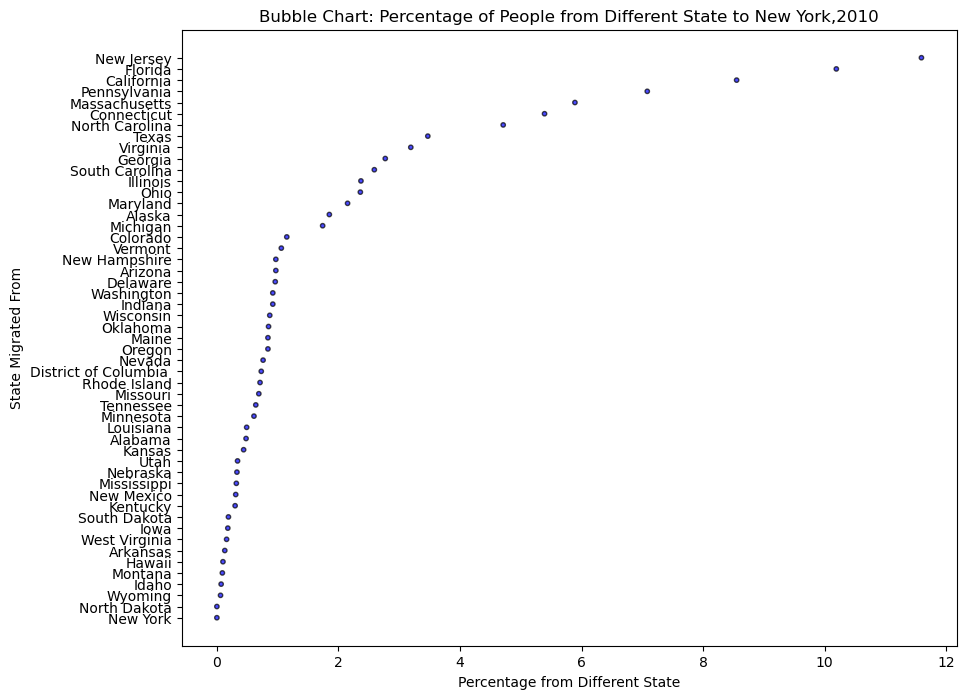

In [151]:
vis1=newyork_2010_sorted.groupby(['Percentage_from_diff_state', 'State_Migrated_from']).size().reset_index(name='Count').sort_values('Percentage_from_diff_state', ascending=True)

# Extracting data for plotting
x_values = vis1['Percentage_from_diff_state']
y_values = vis1['State_Migrated_from']
bubble_sizes = vis1['Count']

# Creating a bubble chart
plt.figure(figsize=(10, 8))
plt.scatter(x_values, y_values, s=bubble_sizes*10, alpha=0.7, c='blue', edgecolors='black', linewidths=1)

# Adding labels and title
plt.xlabel('Percentage from Different State')
plt.ylabel('State Migrated From')
plt.title('Bubble Chart: Percentage of People from Different State to New York,2010')

plt.show()

In [152]:
newyork_2019_sorted.groupby(['Percentage_from_diff_state', 'State_Migrated_from']).size().reset_index(name='Count').sort_values('Percentage_from_diff_state', ascending=False)


Percentage_from_diff_state    State_Migrated_from  Count
50                       11.14             New Jersey      1
49                        8.72             California      1
48                        8.16           Pennsylvania      1
47                        6.93                Florida      1
46                        6.57          Massachusetts      1
45                        5.57            Connecticut      1
44                        4.87                  Texas      1
43                        4.56               Virginia      1
42                        3.72         North Carolina      1
41                        2.47               Illinois      1
40                        2.31               Maryland      1
39                        2.28                Georgia      1
38                        2.21               Colorado      1
37                        2.16                   Ohio      1
36                        2.12              Tennessee      1
35                        2.11               Michigan      1
34                        1.29  District of Columbia       1
33                        1.23         South Carolina      1
32                        1.20                Vermont      1
31                        1.05             Washington      1
30                        0.94          New Hampshire      1
29                        0.92                 Nevada      1
28                        0.87              Minnesota      1
27                        0.85                Arizona      1
26                        0.81                 Oregon      1
25                        0.75                  Maine      1
24                        0.68              Louisiana      1
23                        0.65               Delaware      1
22                        0.63           Rhode Island      1
21                        0.61               Kentucky      1
20                        0.61                   Iowa      1
19                        0.57              Wisconsin      1
18                        0.57                Indiana      1
17                        0.52                 Kansas      1
16                        0.51                 Hawaii      1
15                        0.46                   Utah      1
14                        0.45             New Mexico      1
13                        0.44               Arkansas      1
12                        0.41               Missouri      1
11                        0.33                Alabama      1
10                        0.29               Nebraska      1
9                         0.23                 Alaska      1
8                         0.21          West Virginia      1
7                         0.21               Oklahoma      1
6                         0.17            Mississippi      1
5                         0.10           North Dakota      1
4                         0.08                Montana      1
3                         0.05                  Idaho      1
2                         0.03                Wyoming      1
1                         0.03           South Dakota      1
0                         0.00               New York      1

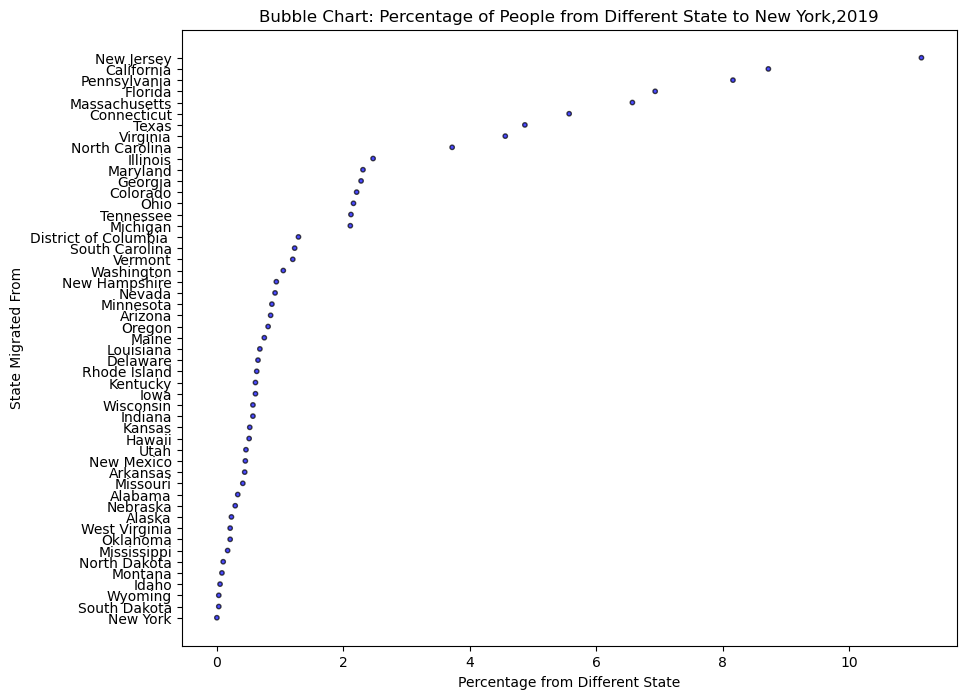

In [153]:
vis2=newyork_2019_sorted.groupby(['Percentage_from_diff_state', 'State_Migrated_from']).size().reset_index(name='Count').sort_values('Percentage_from_diff_state', ascending=True)

# Extracting data for plotting
x_values = vis2['Percentage_from_diff_state']
y_values = vis2['State_Migrated_from']
bubble_sizes = vis2['Count']

# Creating a bubble chart
plt.figure(figsize=(10, 8))
plt.scatter(x_values, y_values, s=bubble_sizes*10, alpha=0.7, c='blue', edgecolors='black', linewidths=1)

# Adding labels and title
plt.xlabel('Percentage from Different State')
plt.ylabel('State Migrated From')
plt.title('Bubble Chart: Percentage of People from Different State to New York,2019')

plt.show()

# FLORIDA 2010 & 2019

In [154]:
Florida_2010=All_states_no_ab_2010[All_states_no_ab_2010['current_state']=='Florida']
Florida_2010_sorted = Florida_2010.sort_values(by='Percentage_from_diff_state', ascending=False)
Florida_2010_sorted

current_state  year  population  from_different_state_Total  \
640        Florida  2010    18647600                      482889   
200        Florida  2010    18647600                      482889   
860        Florida  2010    18647600                      482889   
600        Florida  2010    18647600                      482889   
80         Florida  2010    18647600                      482889   
440        Florida  2010    18647600                      482889   
700        Florida  2010    18647600                      482889   
920        Florida  2010    18647600                      482889   
760        Florida  2010    18647600                      482889   
660        Florida  2010    18647600                      482889   
260        Florida  2010    18647600                      482889   
0          Florida  2010    18647600                      482889   
420        Florida  2010    18647600                      482889   
400        Florida  2010    18647600                      482889   
840        Florida  2010    18647600                      482889   
120        Florida  2010    18647600                      482889   
800        Florida  2010    18647600                      482889   
280        Florida  2010    18647600                      482889   
980        Florida  2010    18647600                      482889   
500        Florida  2010    18647600                      482889   
480        Florida  2010    18647600                      482889   
360        Florida  2010    18647600                      482889   
560        Florida  2010    18647600                      482889   
100        Florida  2010    18647600                      482889   
340        Florida  2010    18647600                      482889   
20         Florida  2010    18647600                      482889   
960        Florida  2010    18647600                      482889   
380        Florida  2010    18647600                      482889   
460        Florida  2010    18647600                      482889   
320        Florida  2010    18647600                      482889   
40         Florida  2010    18647600                      482889   
580        Florida  2010    18647600                      482889   
60         Florida  2010    18647600                      482889   
940        Florida  2010    18647600                      482889   
720        Florida  2010    18647600                      482889   
140        Florida  2010    18647600                      482889   
300        Florida  2010    18647600                      482889   
880        Florida  2010    18647600                      482889   
220        Florida  2010    18647600                      482889   
780        Florida  2010    18647600                      482889   
740        Florida  2010    18647600                      482889   
540        Florida  2010    18647600                      482889   
900        Florida  2010    18647600                      482889   
160        Florida  2010    18647600                      482889   
620        Florida  2010    18647600                      482889   
240        Florida  2010    18647600                      482889   
680        Florida  2010    18647600                      482889   
820        Florida  2010    18647600                      482889   
520        Florida  2010    18647600                      482889   
1000       Florida  2010    18647600                      482889   
180        Florida  2010    18647600                      482889   

      number_of_people    State_Migrated_from  Total_Migration  \
640              55011               New York           537900   
200              35615                Georgia           518504   
860              24039                  Texas           506928   
600              22344             New Jersey           505233   
80               22130             California           505019   
440              21359               Michigan           504248   
700   

In [155]:
Florida_2019=All_states_no_ab_2019[All_states_no_ab_2019['current_state']=='Florida']
Florida_2019_sorted = Florida_2019.sort_values(by='Percentage_from_diff_state', ascending=False)
Florida_2019_sorted

current_state  year  population  from_different_state_Total  \
658        Florida  2019    21269409                      601611   
218        Florida  2019    21269409                      601611   
778        Florida  2019    21269409                      601611   
718        Florida  2019    21269409                      601611   
98         Florida  2019    21269409                      601611   
618        Florida  2019    21269409                      601611   
678        Florida  2019    21269409                      601611   
878        Florida  2019    21269409                      601611   
938        Florida  2019    21269409                      601611   
278        Florida  2019    21269409                      601611   
458        Florida  2019    21269409                      601611   
298        Florida  2019    21269409                      601611   
438        Florida  2019    21269409                      601611   
18         Florida  2019    21269409                      601611   
418        Florida  2019    21269409                      601611   
858        Florida  2019    21269409                      601611   
118        Florida  2019    21269409                      601611   
138        Florida  2019    21269409                      601611   
518        Florida  2019    21269409                      601611   
358        Florida  2019    21269409                      601611   
818        Florida  2019    21269409                      601611   
378        Florida  2019    21269409                      601611   
58         Florida  2019    21269409                      601611   
958        Florida  2019    21269409                      601611   
998        Florida  2019    21269409                      601611   
738        Florida  2019    21269409                      601611   
478        Florida  2019    21269409                      601611   
38         Florida  2019    21269409                      601611   
398        Florida  2019    21269409                      601611   
498        Florida  2019    21269409                      601611   
758        Florida  2019    21269409                      601611   
238        Florida  2019    21269409                      601611   
578        Florida  2019    21269409                      601611   
318        Florida  2019    21269409                      601611   
78         Florida  2019    21269409                      601611   
598        Florida  2019    21269409                      601611   
898        Florida  2019    21269409                      601611   
918        Florida  2019    21269409                      601611   
158        Florida  2019    21269409                      601611   
178        Florida  2019    21269409                      601611   
798        Florida  2019    21269409                      601611   
638        Florida  2019    21269409                      601611   
978        Florida  2019    21269409                      601611   
558        Florida  2019    21269409                      601611   
338        Florida  2019    21269409                      601611   
838        Florida  2019    21269409                      601611   
698        Florida  2019    21269409                      601611   
258        Florida  2019    21269409                      601611   
1018       Florida  2019    21269409                      601611   
538        Florida  2019    21269409                      601611   
198        Florida  2019    21269409                      601611   

      number_of_people    State_Migrated_from  Total_Migration  \
658              57488               New York           659099   
218              49681                Georgia           651292   
778              34965           Pennsylvania           636576   
718              30335                   Ohio           631946   
98               28628             California           630239   
618              28222             New Jersey           629833   
678   

In [156]:
Florida_2010_sorted.groupby(['Percentage_from_diff_state', 'State_Migrated_from']).size().reset_index(name='Count').sort_values('Percentage_from_diff_state', ascending=False)


Percentage_from_diff_state    State_Migrated_from  Count
50                       10.23               New York      1
49                        6.87                Georgia      1
48                        4.74                  Texas      1
47                        4.42             New Jersey      1
46                        4.38             California      1
45                        4.24               Michigan      1
44                        4.18                   Ohio      1
43                        3.99               Virginia      1
42                        3.96           Pennsylvania      1
41                        3.81         North Carolina      1
40                        3.48               Illinois      1
39                        3.17                Alabama      1
38                        2.80          Massachusetts      1
37                        2.67               Maryland      1
36                        2.60              Tennessee      1
35                        2.26            Connecticut      1
34                        2.18         South Carolina      1
33                        1.84                Indiana      1
32                        1.65              Wisconsin      1
31                        1.63               Missouri      1
30                        1.62            Mississippi      1
29                        1.48              Louisiana      1
28                        1.44                 Nevada      1
27                        1.31               Colorado      1
26                        1.29               Kentucky      1
25                        1.20                 Alaska      1
24                        1.15          West Virginia      1
23                        1.13                  Maine      1
22                        1.11              Minnesota      1
21                        0.85                 Kansas      1
20                        0.80                Arizona      1
19                        0.75          New Hampshire      1
18                        0.74               Arkansas      1
17                        0.73             Washington      1
16                        0.71               Oklahoma      1
15                        0.64               Delaware      1
14                        0.60                   Iowa      1
13                        0.58                   Utah      1
12                        0.42                 Hawaii      1
11                        0.41           Rhode Island      1
10                        0.34                 Oregon      1
9                         0.32               Nebraska      1
8                         0.30                Vermont      1
7                         0.23  District of Columbia       1
6                         0.19             New Mexico      1
5                         0.18                  Idaho      1
4                         0.16           North Dakota      1
3                         0.09           South Dakota      1
2                         0.07                Montana      1
1                         0.04                Wyoming      1
0                         0.00                Florida      1

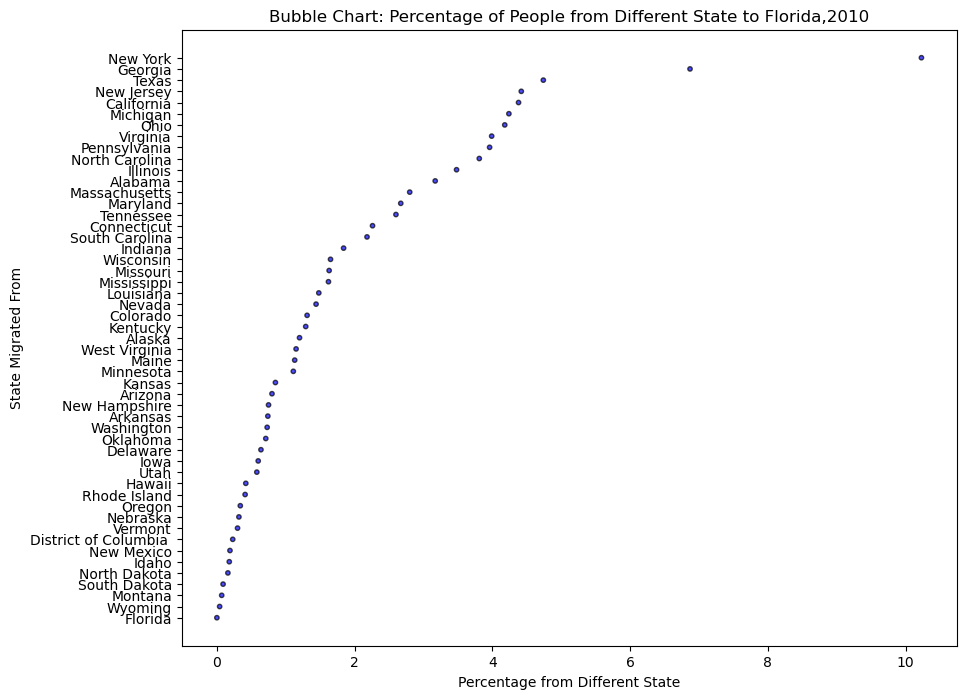

In [157]:
vis3=Florida_2010_sorted.groupby(['Percentage_from_diff_state', 'State_Migrated_from']).size().reset_index(name='Count').sort_values('Percentage_from_diff_state', ascending=True)
# Extracting data for plotting
x_values = vis3['Percentage_from_diff_state']
y_values = vis3['State_Migrated_from']
bubble_sizes = vis3['Count']

# Creating a bubble chart
plt.figure(figsize=(10, 8))
plt.scatter(x_values, y_values, s=bubble_sizes*10, alpha=0.7, c='blue', edgecolors='black', linewidths=1)

# Adding labels and title
plt.xlabel('Percentage from Different State')
plt.ylabel('State Migrated From')
plt.title('Bubble Chart: Percentage of People from Different State to Florida,2010')

plt.show()

In [158]:
Florida_2019_sorted.groupby(['Percentage_from_diff_state', 'State_Migrated_from']).size().reset_index(name='Count').sort_values('Percentage_from_diff_state', ascending=False)


Percentage_from_diff_state    State_Migrated_from  Count
50                        8.72               New York      1
49                        7.63                Georgia      1
48                        5.49           Pennsylvania      1
47                        4.80                   Ohio      1
46                        4.54             California      1
45                        4.48         North Carolina      1
44                        4.48             New Jersey      1
43                        4.17                  Texas      1
42                        4.15               Virginia      1
41                        3.90               Illinois      1
40                        3.48               Michigan      1
39                        2.93                Indiana      1
38                        2.76          Massachusetts      1
37                        2.46                Alabama      1
36                        2.41               Maryland      1
35                        2.37              Tennessee      1
34                        2.22               Colorado      1
33                        2.15            Connecticut      1
32                        1.85               Missouri      1
31                        1.72               Kentucky      1
30                        1.62         South Carolina      1
29                        1.41              Louisiana      1
28                        1.16                Arizona      1
27                        1.13             Washington      1
26                        1.08              Wisconsin      1
25                        1.07               Oklahoma      1
24                        1.03              Minnesota      1
23                        0.81                 Alaska      1
22                        0.79                  Maine      1
21                        0.75            Mississippi      1
20                        0.71                 Oregon      1
19                        0.68                 Hawaii      1
18                        0.61                 Nevada      1
17                        0.61                   Iowa      1
16                        0.59               Arkansas      1
15                        0.58          New Hampshire      1
14                        0.57                   Utah      1
13                        0.55                Vermont      1
12                        0.51               Delaware      1
11                        0.45  District of Columbia       1
10                        0.44           Rhode Island      1
9                         0.39             New Mexico      1
8                         0.36          West Virginia      1
7                         0.32               Nebraska      1
6                         0.30                 Kansas      1
5                         0.23           South Dakota      1
4                         0.20           North Dakota      1
3                         0.17                  Idaho      1
2                         0.10                Wyoming      1
1                         0.10                Montana      1
0                         0.00                Florida      1

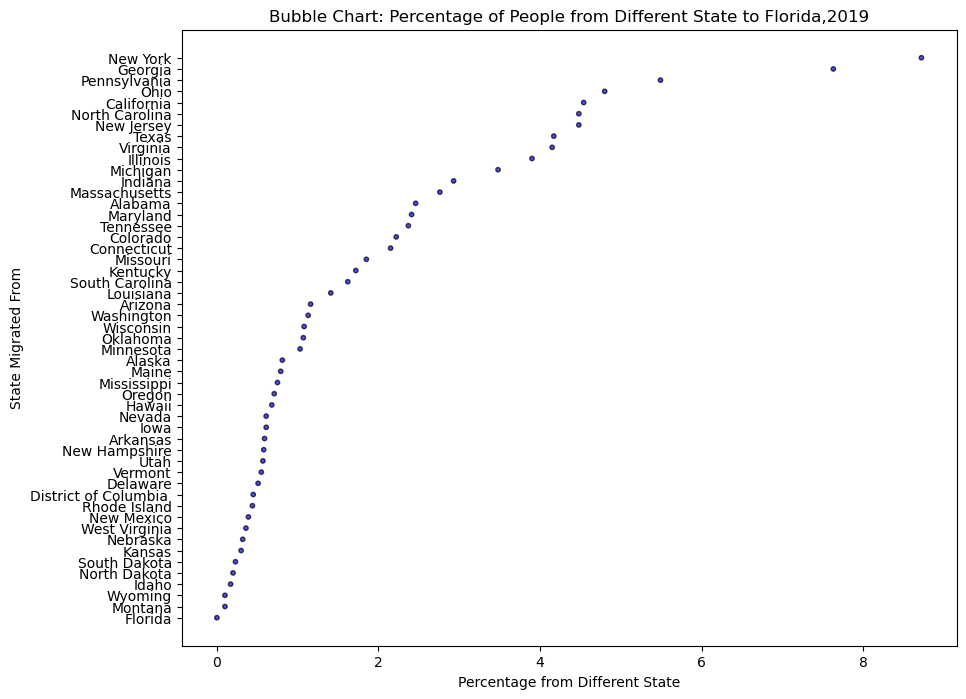

In [159]:
vis4 = Florida_2019_sorted.groupby(['Percentage_from_diff_state', 'State_Migrated_from']).size().reset_index(name='Count').sort_values('Percentage_from_diff_state', ascending=True)

# Extracting data for plotting
x_values = vis4['Percentage_from_diff_state']
y_values = vis4['State_Migrated_from']
bubble_sizes = vis4['Count']

# Creating a bubble chart
plt.figure(figsize=(10, 8))
plt.scatter(x_values, y_values, s=bubble_sizes*10, alpha=0.7, c='blue', edgecolors='black', linewidths=1)

# Adding labels and title
plt.xlabel('Percentage from Different State')
plt.ylabel('State Migrated From')
plt.title('Bubble Chart: Percentage of People from Different State to Florida,2019')

plt.show()

Back to all population group for total from different state for years

In [160]:
population_group

current_state  year  population  from_different_state_Total  \
0          Florida  2010    18647600                      482889   
1         New York  2010    19171916                      269427   
2          Florida  2011    18863948                      498597   
3         New York  2011    19248685                      282209   
4          Florida  2012    19114620                      537148   
5         New York  2012    19352153                      270053   
6          Florida  2013    19345059                      529406   
7         New York  2013    19431954                      272066   
8          Florida  2014    19683763                      546501   
9         New York  2014    19528220                      258571   
10         Florida  2015    20068392                      584938   
11        New York  2015    19570171                      257611   
12         Florida  2016    20401575                      605018   
13        New York  2016    19526443                      260723   
14         Florida  2017    20772371                      566476   
15        New York  2017    19638923                      285252   
16         Florida  2018    21092877                      587261   
17        New York  2018    19329704                      254447   
18         Florida  2019    21269409                      601611   
19        New York  2019    19240920                      254806   
20         Florida  2010    18647600                      482889   
21        New York  2010    19171916                      269427   
22         Florida  2011    18863948                      498597   
23        New York  2011    19248685                      282209   
24         Florida  2012    19114620                      537148   
25        New York  2012    19352153                      270053   
26         Florida  2013    19345059                      529406   
27        New York  2013    19431954                      272066   
28         Florida  2014    19683763                      546501   
29        New York  2014    19528220                      258571   
30         Florida  2015    20068392                      584938   
31        New York  2015    19570171                      257611   
32         Florida  2016    20401575                      605018   
33        New York  2016    19526443                      260723   
34         Florida  2017    20772371                      566476   
35        New York  2017    19638923                      285252   
36         Florida  2018    21092877                      587261   
37        New York  2018    19329704                      254447   
38         Florida  2019    21269409                      601611   
39        New York  2019    19240920                      254806   
40         Florida  2010    18647600                      482889   
41        New York  2010    19171916                      269427   
42         Florida  2011    18863948                      498597   
43        New York  2011    19248685                      282209   
44         Florida  2012    19114620                      537148   
45        New York  2012    19352153                      270053   
46         Florida  2013    19345059                      529406   
47        New York  2013    19431954                      272066   
48         Florida  2014    19683763                      546501   
49        New York  2014    19528220                      258571   
50         Florida  2015    20068392                      584938   
51        New York  2015    19570171                      257611   
52         Florida  2016    20401575                      605018   
53        New York  2016    19526443                      260723   
54         Florida  2017    20772371                      566476   
55        New York  2017    19638923                      285252   
56         Florida  2018    21092877                      587261   
57        New York  2018    19329704                      254

In [161]:
population_group.dtypes

current_state                  object
year                            int64
population                      int64
from_different_state_Total      int64
number_of_people                int64
State_Migrated_from            object
Total_Migration                 int64
Percentage_from_diff_state    float64
dtype: object

In [162]:
#dropping abroad rows and keeping only U.S. states in this DataFrame. Will reuse abroad data later. Will use All_states_no_an_2019 later for florida too.
population_group_no_ab = population_group.drop(
    population_group[
        (population_group['State_Migrated_from'] == 'abroad_PuertoRico') |
        (population_group['State_Migrated_from'] == 'abroad_USIslandArea') |
        (population_group['State_Migrated_from'] == 'abroad_ForeignCountry')
    ].index
)
population_group_no_ab

current_state  year  population  from_different_state_Total  \
0          Florida  2010    18647600                      482889   
1         New York  2010    19171916                      269427   
2          Florida  2011    18863948                      498597   
3         New York  2011    19248685                      282209   
4          Florida  2012    19114620                      537148   
5         New York  2012    19352153                      270053   
6          Florida  2013    19345059                      529406   
7         New York  2013    19431954                      272066   
8          Florida  2014    19683763                      546501   
9         New York  2014    19528220                      258571   
10         Florida  2015    20068392                      584938   
11        New York  2015    19570171                      257611   
12         Florida  2016    20401575                      605018   
13        New York  2016    19526443                      260723   
14         Florida  2017    20772371                      566476   
15        New York  2017    19638923                      285252   
16         Florida  2018    21092877                      587261   
17        New York  2018    19329704                      254447   
18         Florida  2019    21269409                      601611   
19        New York  2019    19240920                      254806   
20         Florida  2010    18647600                      482889   
21        New York  2010    19171916                      269427   
22         Florida  2011    18863948                      498597   
23        New York  2011    19248685                      282209   
24         Florida  2012    19114620                      537148   
25        New York  2012    19352153                      270053   
26         Florida  2013    19345059                      529406   
27        New York  2013    19431954                      272066   
28         Florida  2014    19683763                      546501   
29        New York  2014    19528220                      258571   
30         Florida  2015    20068392                      584938   
31        New York  2015    19570171                      257611   
32         Florida  2016    20401575                      605018   
33        New York  2016    19526443                      260723   
34         Florida  2017    20772371                      566476   
35        New York  2017    19638923                      285252   
36         Florida  2018    21092877                      587261   
37        New York  2018    19329704                      254447   
38         Florida  2019    21269409                      601611   
39        New York  2019    19240920                      254806   
40         Florida  2010    18647600                      482889   
41        New York  2010    19171916                      269427   
42         Florida  2011    18863948                      498597   
43        New York  2011    19248685                      282209   
44         Florida  2012    19114620                      537148   
45        New York  2012    19352153                      270053   
46         Florida  2013    19345059                      529406   
47        New York  2013    19431954                      272066   
48         Florida  2014    19683763                      546501   
49        New York  2014    19528220                      258571   
50         Florida  2015    20068392                      584938   
51        New York  2015    19570171                      257611   
52         Florida  2016    20401575                      605018   
53        New York  2016    19526443                      260723   
54         Florida  2017    20772371                      566476   
55        New York  2017    19638923                      285252   
56         Florida  2018    21092877                      587261   
57        New York  2018    19329704                      254

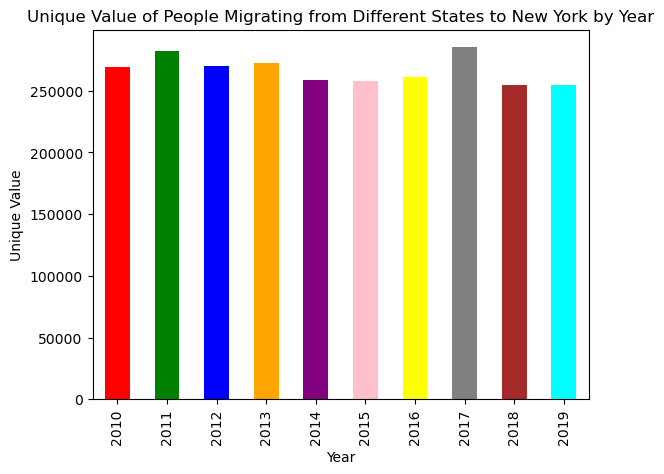

In [163]:
population_group_NY = population_group_no_ab[population_group_no_ab['current_state'] == 'New York']
population_group_NY2 = population_group_NY.groupby("year")["from_different_state_Total"].unique()
#using unique only printed the values as an array rather than an integer.This code extracts the unique value for each year and orders them correctly using the apply and sort index function.
unique_values = population_group_NY2.apply(lambda x: x[0]).sort_index(ascending=True)
unique_values
#now i can plot the values correctly based on each year for NY
#change bar colors
colors = ['red', 'green', 'blue', 'orange', 'purple', 'pink', 'yellow', 'grey', 'brown', 'cyan']  
unique_values.plot(kind='bar', color=colors)

plt.xlabel('Year')
plt.ylabel('Unique Value')
plt.title('Unique Value of People Migrating from Different States to New York by Year')
plt.show()

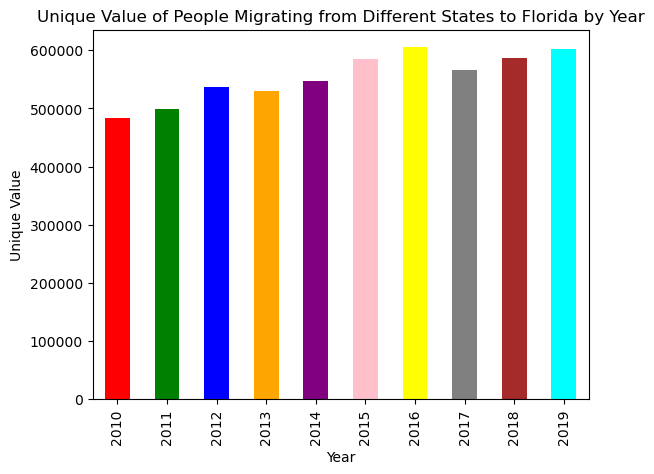

In [164]:
population_group_FL = population_group_no_ab[population_group_no_ab['current_state'] == 'Florida']
population_group_FL2 = population_group_FL.groupby("year")["from_different_state_Total"].unique()
#using unique only printed the values as an array rather than an integer.This code extracts the unique value for each year and orders them correctly using the apply and sort index function.
unique_values = population_group_FL2.apply(lambda x: x[0]).sort_index(ascending=True)

#change bar colors
colors = ['red', 'green', 'blue', 'orange', 'purple', 'pink', 'yellow', 'grey', 'brown', 'cyan']  
unique_values.plot(kind='bar', color=colors)

plt.xlabel('Year')
plt.ylabel('Unique Value')
plt.title('Unique Value of People Migrating from Different States to Florida by Year')
plt.show()

# Analysis
I chose thos data set because I work with census data through by 9-5 and I wanted to see what I could create in python using this data set. Originally I wanted to map the data using one column that i want to display, importing a shape file with the geo coordinates, merge the data set and the columns that I want to work with. But Ifor the sake of this project and the deliverables, I chose to only focus on comparing one state with a similar population size to New York, which in this case was Florida. 

Before continuing with my analysis, I was able to clean and organize the data. While there wasn't much cleaning that needed to be done with zero missing values, instead I renamed created new columns that allowed me to calculate the percentage of people who are migrating to the Florida and New York for each year that is listed in the data set (2010 to 2019). I did this because it was easier to calculate the percentages before creating the visualizations that I wanted to use. Afterwards I created a new data frame that only included United States and not include any U.S. territories in rows that were listed as “abroad”. Chose to focus on 2010 and 2019 as a comparative angle to later calculate the change in migration over time. In my analysis I found that the top five states migrating to New York during the year 2010 were New Jersey, Florida, California, Pennsylvania, and Massachusetts. For 2019 the top five states migrating to New York were from New Jersey, California, Pennsylvania, Florida, Massachusetts. In 2010, people migrating from different states to Florida, were coming in from New York, Georgia, Texas, New Jersey, and California in 2019 people migrating from different states to Florida were coming in from New York, Georgia, Pennsylvania, Ohio, and California. Between both states there is a pattern of cross migration for both years where New York and Florida both fall into each states top five “states_migrated_from” categories.
